In [1]:
!pip install -Uqq fastbook

In [2]:
import fastbook
fastbook.setup_book()

In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
## Bike Types = ['Sport', 'Dirt', 'Scooter' 'Cruiser']

In [27]:
folder = 'sport'
file = 'urls_sport.csv'

In [28]:
path = Path('data/bikes')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [13]:
path.ls()

(#8) [Path('data/bikes/sport'),Path('data/bikes/dirt'),Path('data/bikes/scooter'),Path('data/bikes/cruiser'),Path('data/bikes/urls_sport.csv'),Path('data/bikes/urls_scooter.csv'),Path('data/bikes/urls_dirt.csv'),Path('data/bikes/urls_cruiser.csv')]

In [35]:
dest

Path('data/bikes/sport')

In [31]:
download_images(dest, path/file, max_pics=200)

In [32]:
classes = ['sport','dirt','scooter', 'cruiser']

In [33]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

sport


TypeError: verify_images() got an unexpected keyword argument 'delete'

In [36]:
path = Path('data/bikes')
fns = get_image_files(path)
fns

(#640) [Path('data/bikes/sport/00000000.jpg'),Path('data/bikes/sport/00000002.jpg'),Path('data/bikes/sport/00000001.jpg'),Path('data/bikes/sport/00000008.jpg'),Path('data/bikes/sport/00000004.jpg'),Path('data/bikes/sport/00000009.jpg'),Path('data/bikes/sport/00000005.jpg'),Path('data/bikes/sport/00000007.jpg'),Path('data/bikes/sport/00000006.jpg'),Path('data/bikes/sport/00000003.jpg')...]

In [37]:
failed = verify_images(fns)
failed

(#0) []

In [120]:
bikes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [121]:
dls = bikes.dataloaders(path)

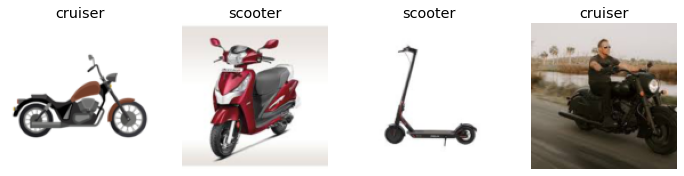

In [122]:
dls.valid.show_batch(max_n=4, nrows=1)

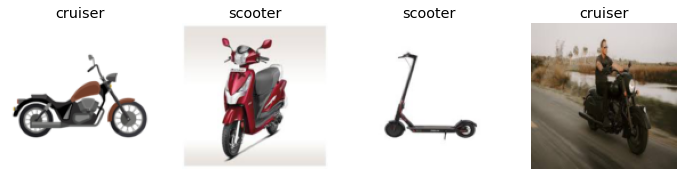

In [123]:
bikes = bikes.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bikes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

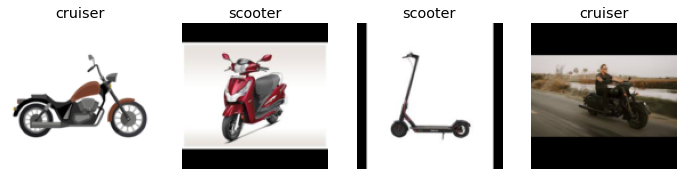

In [124]:
bikes = bikes.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bikes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

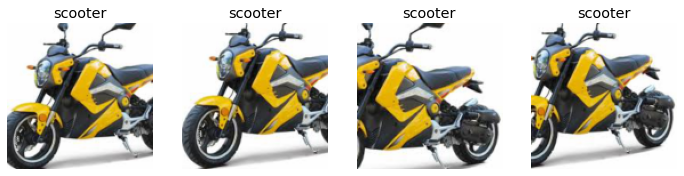

In [125]:
bikes = bikes.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bikes.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

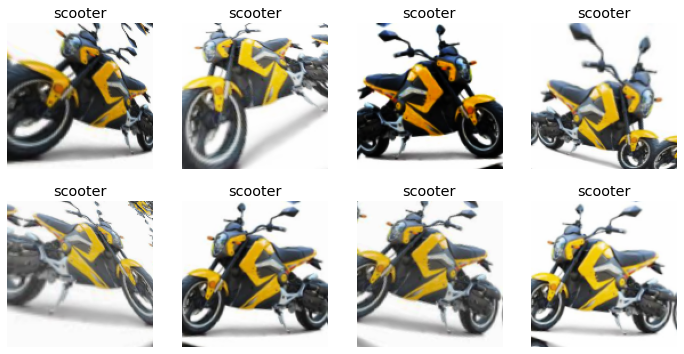

In [126]:
bikes = bikes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bikes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [127]:
bikes = bikes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bikes.dataloaders(path)

In [128]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.928811,0.740185,0.306452,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.973875,0.514223,0.201613,00:07
1,0.786478,0.373591,0.153226,00:07
2,0.644069,0.361639,0.145161,00:07
3,0.551620,0.358654,0.145161,00:07


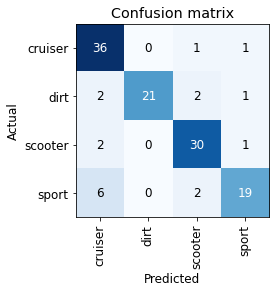

In [129]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

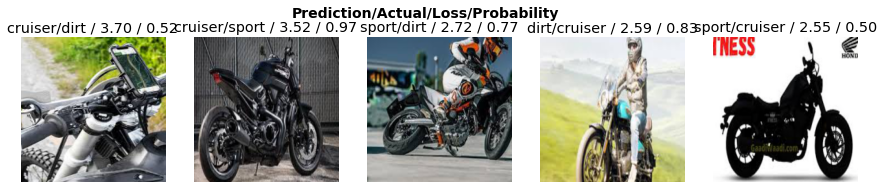

In [114]:
interp.plot_top_losses(5, nrows=1)

In [115]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [116]:
# Delete bad data
for idx in cleaner.delete(): cleaner.fns[idx].unlink() 

In [119]:
# Reclassyfying
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

FileNotFoundError: [Errno 2] No such file or directory: 'data/bikes/scooter/00000122.jpg'

In [60]:
doc(cleanre.fns)

In [130]:
learn.export()

In [131]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [132]:
learn_inf = load_learner(path/'export.pkl')

In [134]:
learn_inf.predict('data/bikes/test/scooter_test.jpg')

('scooter',
 TensorImage(2),
 TensorImage([7.9689e-06, 9.9132e-08, 9.9993e-01, 5.7046e-05]))